In [526]:
""" first thing to do is to import all packages and modules that we need """

' first thing to do is to import all packages and modules that we need '

In [527]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from scipy.spatial.distance import cdist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM, Embedding
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras import metrics
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.utils import np_utils
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import keras.backend as K


In [528]:
"""now let's write some useful functions"""

"now let's write some useful functions"

In [529]:
"""for text preprocessing"""

"""the mission of this  function is to exctract samples with their labels, the form of original data is : "Lensoisdu02:0",<div id="x">XXX</div> <style>  #x{font-family:foo[bar;color:green;}  #y];color:red;{}  </style>:1,1%""))) waitfor delay '0:0:5'--:2
so we can identify human inputs with integer 0, sql injection with integer 1, xss with integer 2"""

def extract_samples_labels(data):
    labels=[]
    for i in range(len(data)):
        label=int(data[i][len(data[i])-1:len(data[i])])
        labels.append(label)
        data[i]=data[i][0:len(data[i])-2]
    return data,labels

#the mission of this  function is to exctract malicious paylods only from original data

def extract_malicious_samples(data):
    malicious_paylods=[]
    for i in range(len(data)):
        if(data[i][len(data[i])-1:len(data[i])]=="2" or data[i][len(data[i])-1:len(data[i])]=="1"):#this sample is a malicious payload
            malicious_paylods.append(data[i][0:len(data[i])-2])
    return malicious_paylods
    
#the mission of this function is loading data from a prepared files then building 4 arrays in order to handle train_data , test_data and their labels
def prepare_data(origin_data):
    #data and labels for training
    train_data,train_labels=extract_samples_labels(origin_data[0])
    #data for labels for  testing
    test_data,test_labels=extract_samples_labels(origin_data[1])
    return train_data,test_data,np_utils.to_categorical(train_labels,num_classes=3),np_utils.to_categorical(test_labels,num_classes=3)

#the mission of this function is calculing the best lengh in order to recover all paylods (we know that human inputs are small usually, so we need to focus on payloads lengh to prevent losing too much informations from payloads)
def best_length(malicious_data):
    lengh_sequences=[len(tokens) for tokens in malicious_data]
    #convert lengh_sequences to array_list so that we can use some useful functions
    lengh_sequences=np.array(lengh_sequences)
    #i think that the value= np.mean(num_tokens) + 3 * np.std(num_tokens will cover the most part of data
    standard_length=int(np.mean(lengh_sequences) + 3 * np.std(lengh_sequences)) 
    return standard_length

#this mission of this function is analysing the vocabulary i.e tokenization
def tokenization_standarization(tuple_data,max_lengh):
    #creating the object Tekonizer
    tokenizer = Tokenizer(num_words=600000,filters="") # you should ask yourself why we need to keep all tokens.. the answer is simple:tokens like '',<>,/,.. are important in order to detect malicious injections   
    #now we give the data"in form text"
    tokenizer.fit_on_texts(tuple_data[0]+tuple_data[1])
    #converting each text to a sequence of numbers
    train_data=tokenizer.texts_to_sequences(tuple_data[0])
    test_data=tokenizer.texts_to_sequences(tuple_data[1])
    train_data=pad_sequences(train_data, maxlen=max_lengh,padding='pre', truncating='pre')
    test_data=pad_sequences(test_data, maxlen=max_lengh,padding='pre', truncating='pre')
    #now we return the result in a form tuple
    return train_data,test_data

In [530]:
""" now it's time of work xD"""

" now it's time of work xD"

In [531]:
#loading data from files
origin_data=([line.rstrip('\n') for line in open("C:\\Users\\pc\\train_phase", encoding="utf-8")],[line.rstrip('\n') for line in open("C:\\Users\\pc\\test_phase",encoding="utf-8")])

In [532]:
#let's print some lines from the dataset: as human you can see the differences beetween the 3 classes
print(origin_data[0][12673])
print("")
print(origin_data[0][672])
print("")
print(origin_data[0][2683])
print("")

e  76 he  ( :2

1') procedure analyse(extractvalue(9255,concat(0x5c,(benchmark(5000000,md5(0x52515a50))))),1) and ('qdhz'='qdhz:2

zbwk bwkv wkvs :0



In [533]:
"""the model can only work with inputs with a fixed size, so we need to calculate the max lengh, as we say before ,the function best_lengh care only  about malicious samples because we know that human inputs(clean code) are small , so we don't want to lose informations by truncating our  malicious paylods into small sequences""" 
max_lengh=best_length(extract_malicious_samples(origin_data[0]+origin_data[1]))
print(max_lengh)

241


In [534]:
""" now we should split each ligne from the origin data into 2 parts: sample and label"""
tuple_4=prepare_data(origin_data)
#printing a sample from train_data with the corresponding label
print(tuple_4[0][256])
print(tuple_4[2][256])

cah15504@aol.com
[1. 0. 0.]


In [535]:
""""" "The time for token creation and normalization has now come: each sample will be converted into a list composed of max_length elements where each element i is a number that presents a word in the vocabulary of the dataset(the vocabulary is composed of 200000 frequents words in the dataset)."""

'"" "The time for token creation and normalization has now come: each sample will be converted into a list composed of max_length elements where each element i is a number that presents a word in the vocabulary of the dataset(the vocabulary is composed of 200000 frequents words in the dataset).'

In [536]:
data=tokenization_standarization((tuple_4[0],tuple_4[1]),max_lengh)

In [537]:
#we replace with 0 all  words that are not present in our vocabulary
print(data[0][13355])


[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [538]:
"""now it's time to build our model, the architecture of the model is : embedding layer in order to  convert the dimension of the space of words(it's hard to work with a a space of 600 000 dimensions ) +1 LSTM layers(by experience ,we increase the probability of overfitting when we build too much layers ),we add the option of dropout with a probability=0.5 in order to prevent overfitting+dense layer with 3 outputs, each node of the output present a class  """

"now it's time to build our model, the architecture of the model is : embedding layer in order to  convert the dimension of the space of words(it's hard to work with a a space of 600 000 dimensions ) +1 LSTM layers(by experience ,we increase the probability of overfitting when we build too much layers ),we add the option of dropout with a probability=0.5 in order to prevent overfitting+dense layer with 3 outputs, each node of the output present a class  "

In [539]:
model_rnn=Sequential()
#adding the first layer:the mission of this layer is representing each word in a continue vector form in order to reduce the dimension of presentation and also reassembling similar words i.e the distance beetween two similare words will be small enough
model_rnn.add(Embedding(input_dim=600000,output_dim=10,input_length=max_lengh,name='layer_embedding'))
#adding the third layer (type lstm with 3 outputs,without returning a sequence)
model_rnn.add(LSTM(units=3,dropout=0.5))
#adding the last layer,fully connected layer with 3 outputs
model_rnn.add(Dense(3,activation='softmax'))
#we will use the algorithme adam as optimizer of the cost function
optimizer = Adam(lr=1e-3)
model_rnn.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
#summary of the model
model_rnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_embedding (Embedding)  (None, 241, 10)           6000000   
_________________________________________________________________
lstm_35 (LSTM)               (None, 3)                 168       
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 12        
Total params: 6,000,180
Trainable params: 6,000,180
Non-trainable params: 0
_________________________________________________________________


In [540]:
"""now it's time to train the model(to make things easy for the him,we added in train data most common n-grams of each class ,so he will be able to find features easily)"""

"now it's time to train the model(to make things easy for the him,we added in train data most common n-grams of each class ,so he will be able to find features easily)"

In [541]:
train_labels=tuple_4[2]
model_rnn.fit(data[0],train_labels,validation_split=0.05, epochs=4, batch_size=64)


C:\Users\pc\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\pc\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 78332 samples, validate on 4123 samples
Epoch 1/4
78332/78332 [==============================] - 462s 6ms/step - loss: 0.4588 - acc: 0.8538 - val_loss: 0.2861 - val_acc: 0.9047
Epoch 2/4
78332/78332 [==============================] - 424s 5ms/step - loss: 0.2079 - acc: 0.9284 - val_loss: 0.1887 - val_acc: 0.9474
Epoch 3/4
78332/78332 [==============================] - 402s 5ms/step - loss: 0.1079 - acc: 0.9668 - val_loss: 0.1482 - val_acc: 0.9607
Epoch 4/4
78332/78332 [==============================] - 407s 5ms/step - loss: 0.0651 - acc: 0.9795 - val_loss: 0.1290 - val_acc: 0.9648


In [554]:
"""time to show new data to the model"""

'time to show new data to the model'

In [555]:
%%time
test_labels=tuple_4[3]
test = model_rnn.evaluate(data[1], test_labels)
print("Accuracy of my model is almost : {0:.4%}".format(test[1]))

16418/16418 [==============================] - 19s 1ms/step
Accuracy of my model is almost : 98.5626%
Wall time: 19.5 s


In [556]:

"""we have to be careful , we should see how the model is dealing with rare classes"""


'we have to be careful , we should see how the model is dealing with rare classes'

In [557]:
predictions = model_rnn.predict(data[1], batch_size=1000)


In [558]:
predictions[13]

array([0.00107704, 0.00502401, 0.993899  ], dtype=float32)

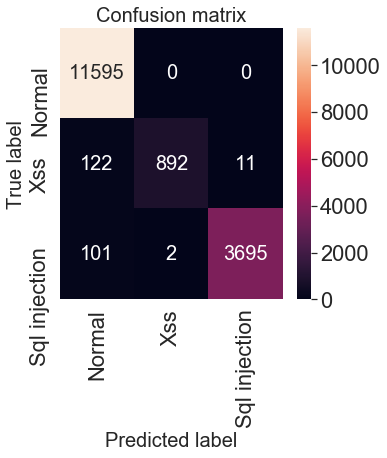

In [559]:
%matplotlib inline
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
LABELS = ['Normal','Xss','Sql injection'] 

max_test = np.argmax(tuple_4[3], axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

In [560]:
"""conclusion: it looks that the model have captured the necessair features for each class,specially for sql injection class and normal inputs class, maybe we need some improvement :more data,focal loss for xss class... """

'conclusion: it looks that the model have captured the necessair features for each class,specially for sql injection class and normal inputs class, maybe we need some improvement :more data,focal loss for xss class... '

In [561]:

"""now i will test my model with some real payloads that i found in hackerone/https://hackerone.com/(bug bounty Xd ),you can check them if you want(why note make money hahaha) """

'now i will test my model with some real payloads that i found in hackerone/https://hackerone.com/(bug bounty Xd ),you can check them if you want(why note make money hahaha) '

In [562]:
#list of payloads
payload_sql1="and (@@version)=1 and '1'='1" #Weak credentials, Blind SQLi, Timing attack, that leads to web admin access check for this title in hackerone
payload_sql2="admin' AND (database()) LIKE ‘%’;--"
payload_sql3="admin' AND (SELECT table_name FROM information_schema.tables WHERE table_schema=database() LIMIT 1 OFFSET 1"") LIKE '%’;--"""
payload_sql4="admin' AND (SELECT password FROM users LIMIT 1 OFFSET 0) LIKE '%’;--"
payload_sql5='(SELECT case when SUBSTR(lastName,1,1) = "S" then 1 else 0 end from user where age = 25 limit 1)'
payload_sql6="'-if(1=2,'0','1')-'"
payload_sql7="')/**/OR/**/MID(0x352e362e33332d6c6f67,1,1)/**/LIKE/**/5/**/%23"
payload_sql8="'-IF(1=1,SLEEP(1),0) AND group_id='1"
new_payloads=[payload_sql1,payload_sql2,payload_sql3,payload_sql4,payload_sql5,payload_sql6,payload_sql7,payload_sql8]

In [563]:
#creation fo a new object tekonizer
my_tokenizer = Tokenizer(num_words=600000,filters="")
my_tokenizer.fit_on_texts(tuple_4[0])
my_tokens = my_tokenizer.texts_to_sequences(new_payloads)
paylods_to_predict= pad_sequences(my_tokens, maxlen=max_lengh,padding='pre', truncating='pre')
model_rnn.predict(paylods_to_predict)


array([[0.01359424, 0.01525007, 0.9711557 ],
       [0.02167095, 0.01946821, 0.9588608 ],
       [0.004319  , 0.00477972, 0.99090135],
       [0.0086448 , 0.00357589, 0.9877793 ],
       [0.00283558, 0.00619471, 0.9909697 ],
       [0.97439826, 0.01733368, 0.00826804],
       [0.97439826, 0.01733368, 0.00826804],
       [0.05874063, 0.08463819, 0.8566212 ]], dtype=float32)

In [564]:
"""conclusion:the model is dealing well with sql injection(he made some mistakes ..we can improve that ..) """

'conclusion:the model is dealing well with sql injection(he made some mistakes ..we can improve that ..) '